Training MSE: 2.0194839173657902e-28
Testing MSE: 4.62805690233892
Training R2: 1.0
Testing R2: 0.9177234328473081


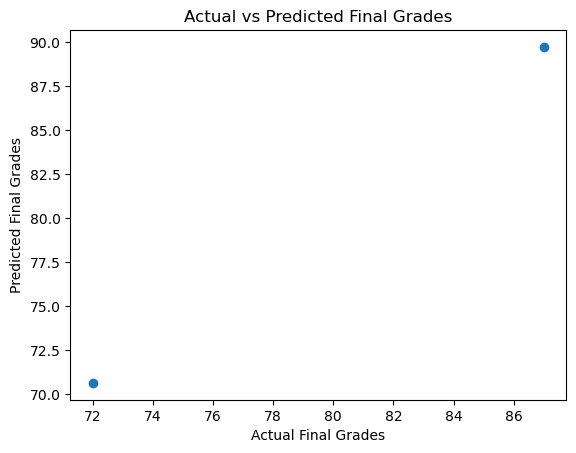

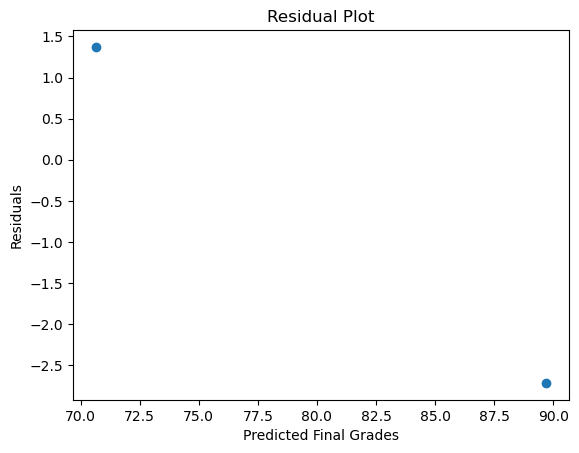

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('student_performance.csv')

# Drop unnecessary columns
data = data.drop(columns=['StudentID', 'Name'])  # Dropping ID and Name as they are not relevant for prediction

# Preprocess the data
# Separating the features (X) and target variable (y)
X = data.drop(columns=['FinalGrade'])
y = data['FinalGrade']

# Apply One-Hot Encoding for categorical features
categorical_features = ['Gender', 'ParentalSupport']
numerical_features = ['AttendanceRate', 'StudyHoursPerWeek', 'PreviousGrade', 'ExtracurricularActivities']

# Applying transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

X_processed = preprocessor.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Model selection and training
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Model evaluation
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f'Training MSE: {train_mse}')
print(f'Testing MSE: {test_mse}')
print(f'Training R2: {train_r2}')
print(f'Testing R2: {test_r2}')

# Visualizing the results
# 1. Predicted vs Actual Final Grades
plt.scatter(y_test, y_test_pred)
plt.xlabel('Actual Final Grades')
plt.ylabel('Predicted Final Grades')
plt.title('Actual vs Predicted Final Grades')
plt.show()

# 2. Residual Plot
residuals = y_test - y_test_pred
plt.scatter(y_test_pred, residuals)
plt.xlabel('Predicted Final Grades')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()
